# Para saber mais: distribuição de frequência de dados quantitativos - classes personalizadas


Nós aprendemos anteriormente a criar uma distribuição de frequência para variáveis quantitativas com amplitude fixa. Agora, vamos aprender também a como construir a distribuição de frequência com classes personalizadas, que é uma outra forma de organizar dados quantitativos em intervalos (ou classes), permitindo uma análise mais clara e estruturada dos valores.

No caso de variáveis quantitativas como a remuneração, agrupar os dados em intervalos facilita a identificação de padrões, como faixas salariais predominantes, dispersões e possíveis desigualdades.

Vamos criar essa distribuição que é ideal para resumir dados grandes, pois ao invés de analisar cada valor individual, agrupamos os dados em categorias que nos permitem interpretar tendências e características. Além disso, será importante para visualizar a concentração ou dispersão dos valores em determinadas faixas, apoiando a tomada de decisões que podem orientar políticas de remuneração e benefícios.

### Distribuindo os salários dos colaboradores por faixas personalizadas
Estamos trabalhando com o dataset colaboradores da empresa varejista que está sob nossa consultoria. O objetivo é construir uma tabela de frequência com base em classes salariais personalizadas, considerando o `salário mínimo (SM) de R$ 1.412,00`, e visualizar os dados em um gráfico de barras para identificar as faixas salariais mais representativas.

As classes são definidas como:

* A: Acima de 12 SM → Acima de R$16.944
* B: De 8 a 12 SM → Entre R$ 11.296 e R$ 16.944
* C: De 4 a 8 SM → Entre R$ 5.648 e R$ 11.296
* D: De 2 a 4 SM → Entre R$ 2.824 e R$ 5.648
* E: Até 2 SM → Até R$ 2.824

Vamos começar lendo os dados e criando as classes de acordo com o salário mínimo na época da pesquisa. Vamos passar também para as classes os valores mínimos e máximos de remuneração que serão importantes para dividir as classes utilizando a função cut.

In [1]:
# Carregando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/alura-cursos/estatistica-r-frequencias-medidas/refs/heads/main/dados/colaboradores.csv"
colaboradores = pd.read_csv(url)

# Definindo o salário mínimo e classes
sm = 1412

# Definindo as classes salariais com base no salário mínimo
classes = [colaboradores['remuneracao'].min(), sm * 2, sm * 4, sm * 8, sm * 12, colaboradores['remuneracao'].max()]

classes

[np.float64(1920.57), 2824, 5648, 11296, 16944, np.float64(32084.55)]

In [2]:
colaboradores.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55


Agora, que definimos as classes em um vetor, vamos criar uma coluna que salva as faixas para cada remuneração dentro da base de dados. Para isso, utilizaremos a mesma função cut que utilizamos no vídeo anterior, mas dessa vez vamos passar o nome da classe (A até E) ao invés do intervalo da faixa para o valor da coluna.

In [6]:
# Definindo as classes salariais com base nas faixas
labels = ['E', 'D', 'C', 'B', 'A']
colaboradores['faixa_salarial'] = pd.cut(colaboradores['remuneracao'], # Coluna utilizada para classificar
                                         bins=classes, #Define os limites dos intervalos ("Classes")
                                         labels=labels, # A etiqueta que nomearão as classes
                                         right=True, # Define se o limite superior está incluído
                                         include_lowest=True # Inclui o menor valor possível.
                                         )

colaboradores

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,faixa_salarial
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79,A
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07,A
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61,A
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60,A
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55,A
...,...,...,...,...,...,...,...,...
11085,REP011086,Nicolas Mendes,Masculino,40,Repositor(a),Bom,3340.72,D
11086,REP011087,Maria Luísa Câmara,Feminino,48,Repositor(a),Insuficiente,3330.98,D
11087,REP011088,Allana da Mota,Feminino,28,Repositor(a),Excelente,3382.03,D
11088,REP011089,Bruno Rezende,Masculino,36,Repositor(a),Bom,3088.46,D


Agora, vamos agrupar os dados por classe e criar a distribuição de frequência absoluta e relativa, atualizando a variável classes_salariais.

In [ ]:
# Tabela de frequência das faixas salariais
frequencias = colaboradores['faixa_salarial'].value_counts().sort_index()

frequencias # frequência absoluta

faixa_salarial
E     948
D    8070
C    1944
B      93
A      35
Name: count, dtype: int64

In [ ]:
frequencias_r = colaboradores['faixa_salarial'].value_counts(normalize=True).mul(100).round(2).sort_index()
frequencias_r # Frequências relativas %

faixa_salarial
E     8.55
D    72.77
C    17.53
B     0.84
A     0.32
Name: proportion, dtype: float64

In [11]:
# Agrupar por faixa salarial e calcular a frequência e porcentagem
classes_salariais = colaboradores.groupby('faixa_salarial', observed=False ).size().reset_index(name='frequencia')

classes_salariais

,faixa_salarial,frequencia
0,E,948
1,D,8070
2,C,1944
3,B,93
4,A,35


In [12]:
# Calcular a porcentagem
classes_salariais['porcentagem'] = (classes_salariais['frequencia'] / len(colaboradores)) * 100

classes_salariais

,faixa_salarial,frequencia,porcentagem
0,E,948,8.548242
1,D,8070,72.768260
2,C,1944,17.529306
3,B,93,0.838593
4,A,35,0.315600


In [13]:
# Ordenar pelas classes salariais
classes_salariais = classes_salariais.sort_values(by='faixa_salarial')

classes_salariais

,faixa_salarial,frequencia,porcentagem
0,E,948,8.548242
1,D,8070,72.768260
2,C,1944,17.529306
3,B,93,0.838593
4,A,35,0.315600


Agora que já conseguimos construir a tabela de frequências, vamos visualizar a distribuição em um gráfico de barras:

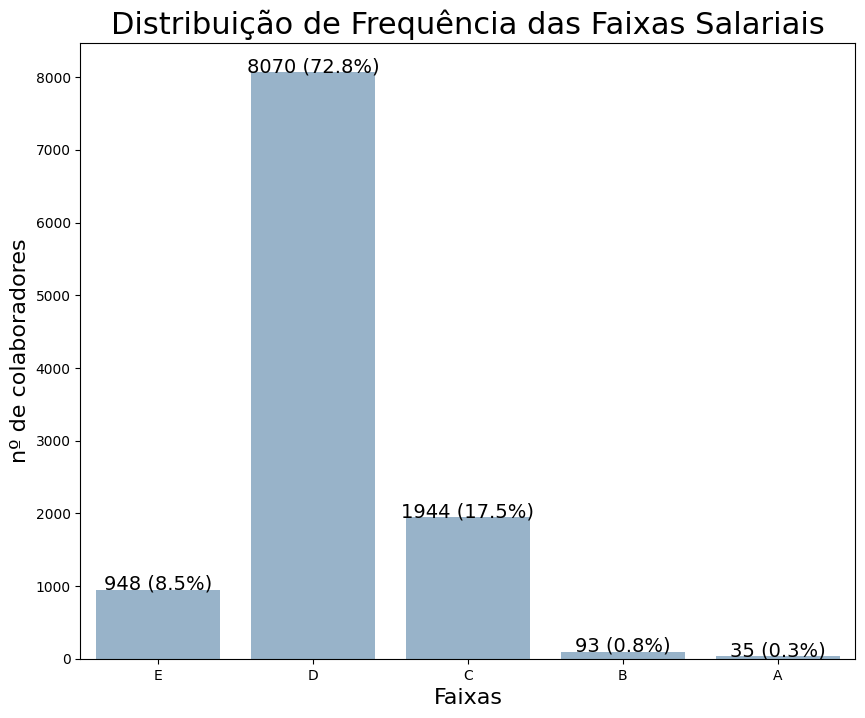

In [ ]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criando o gráfico de barras
sns.barplot(x='faixa_salarial', # Eixo X do gráfico
            y='frequencia', # Eixo Y do gráfico
            data=classes_salariais, # DataFrame
            color='steelblue', # cor tema
            alpha=0.6 # Clarea as barras
            )

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Frequência das Faixas Salariais', fontsize=22, ha='center')
plt.xlabel('Faixas', fontsize=16)
plt.ylabel('nº de colaboradores', fontsize=16)

# Adicionando rótulos de frequência e porcentagem acima das barras
for i, row in classes_salariais.iterrows():
    plt.text(i, row['frequencia'] + 2, f"{row['frequencia']} ({round(row['porcentagem'], 1)}%)",
             ha='center', fontsize=14)

# Exibindo o gráfico
plt.show()

Após a criação do gráfico e da tabela de frequências, podemos tirar algumas conclusões:

* A maior parte dos colaboradores está concentrada na classe D , representando remunerações na faixa de 2 até 4 salários mínimos.
* As classes A e B representam aproximadamente 1.1% de todos os colaboradores, ou seja, apenas 128 colaboradores dos 11.090 recebem 8 salários mínimos ou mais.

* Este comportamento é comum em empresas varejistas, onde grande parte dos colaboradores trabalha em funções operacionais, como atendimento e logística.